In [2]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
churn = pd.read_csv('subscribers.csv')
churn.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True
227624,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,...,0.3303,ar,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,...,0.0367,ar,NaN,14,True,1,2020/1/4 19:40,2020/5/4 19:40,NaN,True
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Paypal,14,True,1,2020/1/31 23:58,2020/5/31 23:58,NaN,True


In [4]:
#delete people who are charged but cancel during trial period

churn= churn[-((churn['cancel_date'].isnull()==False)&(churn['payment_period']==1)&(churn['trial_completed']==False))]
churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True
227624,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,...,0.3303,ar,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,...,0.0367,ar,NaN,14,True,1,2020/1/4 19:40,2020/5/4 19:40,NaN,True
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Paypal,14,True,1,2020/1/31 23:58,2020/5/31 23:58,NaN,True


In [5]:
churn=churn.reset_index(drop=True)

In [6]:
for i in range(0,len(churn)):
    if (churn.loc[i,'age']>1930)&(churn.loc[i,'age']<2018):
        churn.loc[i,'age']=2020-churn.loc[i,'age']
    elif (churn.loc[i,'age']>100)&(churn.loc[i,'age']<1930):
        churn.loc[i,'age']=None
    elif churn.loc[i,'age']>2018:
        churn.loc[i,'age']=None

In [7]:
churn.dropna(subset=["age"],inplace=True)

In [8]:
a=churn.num_weekly_services_utilized.mode()
b=churn.num_ideal_streaming_services.mode()
#data.fillna(data.mode().iloc['num_weekly_services_utilized','num_weekly_services_utilized'])
churn['num_weekly_services_utilized'].fillna(float(a),inplace=True)
churn['num_ideal_streaming_services'].fillna(float(b),inplace=True)

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192087 entries, 1 to 227358
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         192087 non-null  int64  
 1   package_type                  156647 non-null  object 
 2   num_weekly_services_utilized  192087 non-null  float64
 3   preferred_genre               155897 non-null  object 
 4   intended_use                  188577 non-null  object 
 5   weekly_consumption_hour       189329 non-null  float64
 6   num_ideal_streaming_services  192087 non-null  float64
 7   age                           192087 non-null  float64
 8   male_TF                       192083 non-null  object 
 9   country                       192087 non-null  object 
 10  attribution_technical         192087 non-null  object 
 11  attribution_survey            189479 non-null  object 
 12  op_sys                        179005 non-nul

In [10]:
churn.dropna(subset=['package_type','preferred_genre'],inplace=True)
churn = churn.drop(churn[churn['weekly_consumption_hour']<0].index)
churn.dropna(subset=['weekly_consumption_hour','intended_use','male_TF','op_sys','attribution_survey'],inplace=True)

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143900 entries, 2 to 227358
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         143900 non-null  int64  
 1   package_type                  143900 non-null  object 
 2   num_weekly_services_utilized  143900 non-null  float64
 3   preferred_genre               143900 non-null  object 
 4   intended_use                  143900 non-null  object 
 5   weekly_consumption_hour       143900 non-null  float64
 6   num_ideal_streaming_services  143900 non-null  float64
 7   age                           143900 non-null  float64
 8   male_TF                       143900 non-null  object 
 9   country                       143900 non-null  object 
 10  attribution_technical         143900 non-null  object 
 11  attribution_survey            143900 non-null  object 
 12  op_sys                        143900 non-nul

In [82]:
churn = churn[churn['plan_type'] == 'base_uae_14_day_trial']
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143591 entries, 2 to 227358
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         143591 non-null  int64  
 1   package_type                  143591 non-null  object 
 2   num_weekly_services_utilized  143591 non-null  float64
 3   preferred_genre               143591 non-null  object 
 4   intended_use                  143591 non-null  object 
 5   weekly_consumption_hour       143591 non-null  float64
 6   num_ideal_streaming_services  143591 non-null  float64
 7   age                           143591 non-null  float64
 8   male_TF                       143591 non-null  object 
 9   country                       143591 non-null  object 
 10  attribution_technical         143591 non-null  object 
 11  attribution_survey            143591 non-null  object 
 12  op_sys                        143591 non-nul

In [35]:
subset = churn[churn.payment_period>=1]
subset

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True
6,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,...,0.3303,ar,Standard Charter,14,True,1,2020/3/4 18:30,2020/7/4 18:30,NaN,True
7,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,...,0.0000,ar,RAKBANK,14,True,1,2020/3/19 14:52,2020/7/19 14:52,NaN,True
8,24930568,base,3.0,comedy,access to exclusive content,25.851492,2.0,73.0,False,UAE,...,0.6606,ar,NaN,14,True,1,2020/3/8 17:50,2020/7/8 17:50,NaN,True
11,21361112,enhanced,3.0,comedy,access to exclusive content,37.451142,2.0,24.0,True,UAE,...,0.3303,ar,NaN,14,True,1,2019/12/15 7:29,2020/4/15 7:29,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227352,25549852,enhanced,3.0,comedy,access to exclusive content,28.751405,2.0,61.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020/3/20 2:57,2020/7/20 2:57,NaN,True
227353,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,...,0.0000,ar,NaN,14,True,1,2020/1/15 22:43,2020/5/15 22:43,NaN,True
227354,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True
227355,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,...,0.3303,ar,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True


In [36]:
subset['churn']=0
subset

<ipython-input-36-135828ec7555>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['churn']=0


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True,0
6,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,...,ar,Standard Charter,14,True,1,2020/3/4 18:30,2020/7/4 18:30,NaN,True,0
7,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,...,ar,RAKBANK,14,True,1,2020/3/19 14:52,2020/7/19 14:52,NaN,True,0
8,24930568,base,3.0,comedy,access to exclusive content,25.851492,2.0,73.0,False,UAE,...,ar,NaN,14,True,1,2020/3/8 17:50,2020/7/8 17:50,NaN,True,0
11,21361112,enhanced,3.0,comedy,access to exclusive content,37.451142,2.0,24.0,True,UAE,...,ar,NaN,14,True,1,2019/12/15 7:29,2020/4/15 7:29,NaN,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227352,25549852,enhanced,3.0,comedy,access to exclusive content,28.751405,2.0,61.0,False,UAE,...,ar,NaN,14,True,1,2020/3/20 2:57,2020/7/20 2:57,NaN,True,0
227353,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,...,ar,NaN,14,True,1,2020/1/15 22:43,2020/5/15 22:43,NaN,True,0
227354,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,...,ar,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True,0
227355,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,...,ar,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True,0


In [37]:
subset_churn = churn[churn.payment_period==0]
subset_churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,3.0,drama,replace OTT,20.051667,2.0,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
9,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,UAE,...,0.3303,ar,NaN,14,False,0,NaN,NaN,2020/1/27 0:00,False
12,25393847,base,2.0,regional,supplement OTT,28.751405,2.0,57.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
13,23163827,economy,3.0,comedy,replace OTT,33.101274,2.0,54.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227335,24614848,base,3.0,regional,replace OTT,25.851492,2.0,36.0,False,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
227344,20172551,base,3.0,comedy,replace OTT,21.501623,2.0,45.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
227345,24317364,enhanced,2.0,comedy,replace OTT,30.201361,2.0,52.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
227349,22218943,economy,3.0,comedy,replace OTT,37.451142,2.0,67.0,True,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,2019/11/27 0:00,False


In [38]:
#delete customers who have not decided yet in period 0  
#define these customers as churned customer and label them as 1
subset1= subset_churn[-((subset_churn['payment_period']==0)&(subset_churn['current_sub_TF']==True)&(subset_churn['trial_completed']==True))]
subset1['churn']=1
subset1

<ipython-input-38-fbcf583ba2fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1['churn']=1


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
3,29417030,base,3.0,drama,replace OTT,20.051667,2.0,30.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
9,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,2020/1/27 0:00,False,1
12,25393847,base,2.0,regional,supplement OTT,28.751405,2.0,57.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
13,23163827,economy,3.0,comedy,replace OTT,33.101274,2.0,54.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227335,24614848,base,3.0,regional,replace OTT,25.851492,2.0,36.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
227344,20172551,base,3.0,comedy,replace OTT,21.501623,2.0,45.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
227345,24317364,enhanced,2.0,comedy,replace OTT,30.201361,2.0,52.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
227349,22218943,economy,3.0,comedy,replace OTT,37.451142,2.0,67.0,True,UAE,...,ar,NaN,14,False,0,NaN,NaN,2019/11/27 0:00,False,1


In [39]:
# What i can use for my training data
subset = pd.concat([subset,subset1])
subset

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True,0
6,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,...,ar,Standard Charter,14,True,1,2020/3/4 18:30,2020/7/4 18:30,NaN,True,0
7,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,...,ar,RAKBANK,14,True,1,2020/3/19 14:52,2020/7/19 14:52,NaN,True,0
8,24930568,base,3.0,comedy,access to exclusive content,25.851492,2.0,73.0,False,UAE,...,ar,NaN,14,True,1,2020/3/8 17:50,2020/7/8 17:50,NaN,True,0
11,21361112,enhanced,3.0,comedy,access to exclusive content,37.451142,2.0,24.0,True,UAE,...,ar,NaN,14,True,1,2019/12/15 7:29,2020/4/15 7:29,NaN,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227335,24614848,base,3.0,regional,replace OTT,25.851492,2.0,36.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
227344,20172551,base,3.0,comedy,replace OTT,21.501623,2.0,45.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
227345,24317364,enhanced,2.0,comedy,replace OTT,30.201361,2.0,52.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
227349,22218943,economy,3.0,comedy,replace OTT,37.451142,2.0,67.0,True,UAE,...,ar,NaN,14,False,0,NaN,NaN,2019/11/27 0:00,False,1


In [40]:
variable=subset.loc[:,['package_type', 'num_weekly_services_utilized', 'preferred_genre','intended_use',
                      'weekly_consumption_hour','num_ideal_streaming_services','age','male_TF',
                      'attribution_technical','op_sys','join_fee','initial_credit_card_declined']]
variable

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,join_fee,initial_credit_card_declined
4,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,iOS,0.0367,False
6,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,Android,0.3303,False
7,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,email,iOS,0.0000,False
8,base,3.0,comedy,access to exclusive content,25.851492,2.0,73.0,False,facebook,iOS,0.6606,False
11,enhanced,3.0,comedy,access to exclusive content,37.451142,2.0,24.0,True,search,iOS,0.3303,False
...,...,...,...,...,...,...,...,...,...,...,...,...
227335,base,3.0,regional,replace OTT,25.851492,2.0,36.0,False,facebook,iOS,0.1101,False
227344,base,3.0,comedy,replace OTT,21.501623,2.0,45.0,False,facebook,Android,0.0367,False
227345,enhanced,2.0,comedy,replace OTT,30.201361,2.0,52.0,False,facebook,iOS,0.0367,False
227349,economy,3.0,comedy,replace OTT,37.451142,2.0,67.0,True,brand sem intent bing,iOS,0.0367,False


In [41]:
x_train = pd.get_dummies(variable,drop_first=True)

x_train

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,join_fee,initial_credit_card_declined,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,...,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_iOS
4,4.0,22.951579,3.0,28.0,0.0367,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2.0,20.051667,2.0,61.0,0.3303,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.0,34.551230,2.0,23.0,0.0000,False,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,3.0,25.851492,2.0,73.0,0.6606,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,3.0,37.451142,2.0,24.0,0.3303,False,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227335,3.0,25.851492,2.0,36.0,0.1101,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227344,3.0,21.501623,2.0,45.0,0.0367,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227345,2.0,30.201361,2.0,52.0,0.0367,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
227349,3.0,37.451142,2.0,67.0,0.0367,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
y_train=subset.loc[:,['churn']]
y_train

,churn
4,0
6,0
7,0
8,0
11,0
...,...
227335,1
227344,1
227345,1
227349,1


In [44]:
x_test=subset_churn[(subset_churn['payment_period']==0)&(subset_churn['current_sub_TF']==True)&(subset_churn['trial_completed']==True)]
x_test
               

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
48,20395793,base,2.0,drama,access to exclusive content,20.051667,2.0,25.0,False,UAE,...,0.1101,ar,NaN,14,True,0,NaN,2020/4/5 0:47,NaN,True
62,25129642,enhanced,3.0,comedy,access to exclusive content,25.851492,2.0,81.0,False,UAE,...,0.0000,ar,NaN,14,True,0,NaN,2020/4/4 14:51,NaN,True
77,28758163,enhanced,3.0,drama,access to exclusive content,31.651317,2.0,43.0,False,UAE,...,0.0000,ar,NaN,14,True,0,NaN,2020/4/6 21:37,NaN,True
81,26795774,base,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,...,0.3303,ar,Standard Charter,14,True,0,NaN,2020/4/8 4:37,NaN,True
165,20528392,base,3.0,comedy,replace OTT,33.101274,2.0,32.0,True,UAE,...,0.3303,ar,Standard Charter,14,True,0,NaN,2020/4/9 1:15,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227238,27830586,economy,5.0,international,access to exclusive content,40.351055,3.0,62.0,True,UAE,...,0.3303,ar,Standard Charter,14,True,0,NaN,2020/4/2 13:57,NaN,True
227243,25744972,enhanced,4.0,drama,access to exclusive content,24.401536,2.0,31.0,False,UAE,...,0.0367,ar,NaN,14,True,0,NaN,2020/4/3 3:12,NaN,True
227300,22732963,enhanced,4.0,drama,access to exclusive content,30.201361,3.0,50.0,False,UAE,...,0.0000,ar,NaN,14,True,0,NaN,2020/4/9 3:29,NaN,True
227320,24139708,base,3.0,drama,access to exclusive content,34.551230,2.0,38.0,True,UAE,...,0.3303,ar,NaN,14,True,0,NaN,2020/3/30 12:55,NaN,True


In [46]:
train_x,valid_x,train_y,valid_y=train_test_split(x_train,y_train,test_size=0.3,random_state=40)

In [89]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr_model= LogisticRegression(max_iter=1000)
lr_model.fit(train_x,train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=1000)

In [95]:
prepro = lr_model.predict_proba(valid_x)[:,1]
prevalue = lr_model.predict(valid_x)
acc = lr_model.score(valid_x,valid_y)
acc

0.8247821878025169

In [ ]:
pre = lr_model.predict()

In [102]:
prepro

array([0.1303775 , 0.21975687, 0.95304367, ..., 0.2911191 , 0.09242763,
       0.17672323])

In [92]:
prevalue

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
roc_auc_score(valid_y, prevalue)

0.7920967624597793

[[24474  2978]
 [ 4262  9606]]


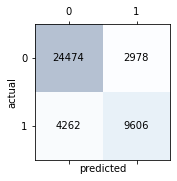

In [86]:
from sklearn.metrics import confusion_matrix
#y_pred = prevalue.predict(valid_x)
confmat = confusion_matrix(y_true=valid_y, y_pred=prevalue)
print(confmat)

# 将混淆矩阵可视化
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

AUC of LR Classifier: 0.7920967624597793


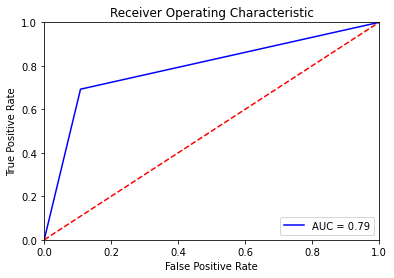

In [91]:
from sklearn.metrics import roc_curve

import numpy as np

y = np.array(valid_y)

prevalue = np.array(prevalue)

fpr, tpr, thresholds = roc_curve(valid_y, prevalue)

from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)

print('AUC of LR Classifier:',auc(fpr, tpr))

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([0,1.0])

plt.ylim([0,1.0])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()



